In [1]:
#RNN,LSTM and GRU with python

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
import math

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
#Import and show dataset
data = pd.read_csv(r"C:\Users\laksh\Downloads\NIKKEI225.csv")
print("Shape of Data:",data.shape)
data.head()

Shape of Data: (1305, 2)


,observation_date,NIKKEI225
0,2020-07-20,22717.48
1,2020-07-21,22884.22
2,2020-07-22,22751.61
3,2020-07-23,NaN
4,2020-07-24,NaN


In [5]:
#Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  1305 non-null   object 
 1   NIKKEI225         1224 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.5+ KB


In [6]:
#Data Preprocessing(1)
data = data.dropna()

# Remove rows with *any* zero value
data = data[(data != 0).all(axis=1)]



In [7]:
#Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1224 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  1224 non-null   object 
 1   NIKKEI225         1224 non-null   float64
dtypes: float64(1), object(1)
memory usage: 28.7+ KB


<Axes: >

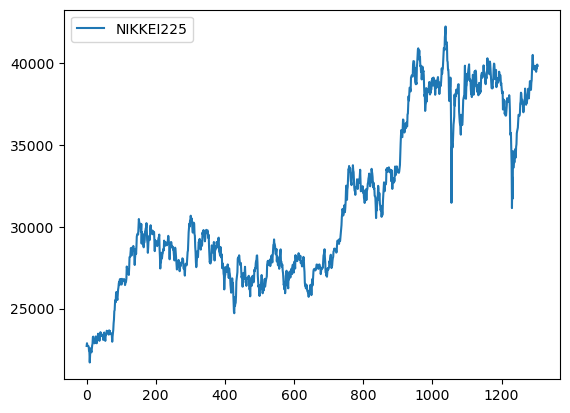

In [8]:
#Plot data
data.plot()

In [9]:
#Create a dataframe with only NIKKEI225
df=data.filter(['NIKKEI225'])

#Convert the dataframe to a NumPy array
df=df.values
print(df[:5])

[[22717.48]
 [22884.22]
 [22751.61]
 [22715.85]
 [22657.38]]


In [10]:
#Normalize the data to make it applicable for RNN
scaler=MinMaxScaler(feature_range=(0,1))
df_scaled=scaler.fit_transform(df)
df_scaled[:5]

array([[0.04911178],
       [0.05723988],
       [0.05077552],
       [0.04903232],
       [0.04618207]])

In [11]:
#Split data into predictors and outcomes
#Predict the present stock price by the past 5 days' stock prices
X=[]
y=[]
sequence=5

for i in range(len(df_scaled)-sequence):
    X.append(df_scaled[i:(i + sequence),0])
    y.append(df_scaled[i:(i + sequence),0])

X,y = np.array(X),np.array(y)

In [12]:
#Show the predictors and outcomes
print("Predictors")
print(X[:5])
print("Outcomes")
print(y[:5])

Predictors
[[0.04911178 0.05723988 0.05077552 0.04903232 0.04618207]
 [0.05723988 0.05077552 0.04903232 0.04618207 0.03349465]
 [0.05077552 0.04903232 0.04618207 0.03349465 0.03067317]
 [0.04903232 0.04618207 0.03349465 0.03067317 0.        ]
 [0.04618207 0.03349465 0.03067317 0.         0.02366089]]
Outcomes
[[0.04911178 0.05723988 0.05077552 0.04903232 0.04618207]
 [0.05723988 0.05077552 0.04903232 0.04618207 0.03349465]
 [0.05077552 0.04903232 0.04618207 0.03349465 0.03067317]
 [0.04903232 0.04618207 0.03349465 0.03067317 0.        ]
 [0.04618207 0.03349465 0.03067317 0.         0.02366089]]


In [13]:
#Reshape the predictor so that it can be handled by RNN
x=np.reshape(X,(X.shape[0],X.shape[1],1))
X.shape

(1219, 5)

In [14]:
#Split data into training and test sets
train_size = math.ceil(len(X)*0.75)

#Split X and y into training and test sets
X_train = X[:train_size,:]
y_train = y[:train_size]

X_test = X[train_size:len(X),:]
y_test = y[train_size:len(y)]

In [15]:
#Show the size of training and test sets
print("X_train:" ,X_train.shape)
print("y_train:" ,y_train.shape)
print("X_test:"  ,X_test.shape)
print("y_test:"  ,y_test.shape)


X_train: (915, 5)
y_train: (915, 5)
X_test: (304, 5)
y_test: (304, 5)


In [16]:
# Build Simple RNN model
rnn=Sequential()
rnn.add(SimpleRNN(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
rnn.add(SimpleRNN(units=32, return_sequences=True))
rnn.add(SimpleRNN(units=32, return_sequences=True))
rnn.add(SimpleRNN(units=32))
rnn.add(Dense(units=1))

rnn.compile(optimizer='adam',
loss='mean_squared_error')

rnn.summary()

d:\Anaconda\envs\keras_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 5, 32)          │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 5, 32)          │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 5, 32)          │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,361 (28.75 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Build LSTM model
Istm=Sequential()
Istm.add(LSTM(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
Istm.add(LSTM(units=32, return_sequences=True))
Istm.add(LSTM(units=32, return_sequences=True))
Istm.add(LSTM(units=32))
Istm.add(Dense(units=1))

Istm.compile(optimizer='adam',
loss='mean_squared_error')

Istm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 32)          │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5, 32)          │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 5, 32)          │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Build GRU model
gru=Sequential()
gru.add(GRU(units=32, return_sequences=True, input_shape=(X_train.shape[1],1)))
gru.add(GRU(units=32, return_sequences=True))
gru.add(GRU(units=32, return_sequences=True))
gru.add(GRU(units=32))
gru.add(Dense(units=1))

gru.compile(optimizer='adam',
loss='mean_squared_error')

gru.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 5, 32)          │         3,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 5, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 5, 32)          │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 32)             │         6,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,401 (87.50 KB)

 Trainable params: 22,401 (87.50 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#Set early stopping
early_stop = EarlyStopping(monitor='val_loss',patience=500)

In [20]:
# Fit RNN model and store the history
rnn_history = rnn.fit(X_train, y_train,
batch_size=16,
epochs=1000,
validation_split=0.2,
callbacks=[early_stop],
verbose=1)

Epoch 1/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0616 - val_loss: 0.0286
Epoch 2/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - val_loss: 0.0118
Epoch 3/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.6354e-04 - val_loss: 0.0072
Epoch 4/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.4026e-04 - val_loss: 0.0054
Epoch 5/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2032e-04 - val_loss: 0.0043
Epoch 6/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3423e-04 - val_loss: 0.0039
Epoch 7/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9423e-04 - val_loss: 0.0036
Epoch 8/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8069e-04 - val_loss: 0.0039
Epoch 9/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.4953e-04 - val_loss: 0.0034
Epoch 10/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9655e-04 - val_loss: 0.0032
Epoch 11/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7719e-04 - val_loss: 0.0032
Epoch 12/1000
4

In [21]:
# Fit LSTM model and store the history
Istm_history = Istm.fit(X_train, y_train,
batch_size=16,
epochs=1000,
validation_split=0.2,
callbacks=[early_stop],
verbose=1)

Epoch 1/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0465 - val_loss: 0.0807
Epoch 2/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0063 - val_loss: 0.0014
Epoch 3/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.7703e-04 - val_loss: 0.0019
Epoch 4/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.8247e-04 - val_loss: 8.1021e-04
Epoch 5/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1759e-04 - val_loss: 4.5145e-04
Epoch 6/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0653e-04 - val_loss: 6.4450e-04
Epoch 7/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8995e-04 - val_loss: 0.0012
Epoch 8/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.5948e-04 - val_loss: 0.0018
Epoch 9/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.1410e-04 - val_loss: 0.0016
Epoch 10/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.8230e-04 - val_loss: 0.0011
Epoch 11/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.0014e-04 - val_loss: 0.0012
Epo

In [22]:
# Fit GRU model and store the history
gru_history = gru.fit(X_train, y_train,
batch_size=16,
epochs=1000,
validation_split=0.2,
#callbacks=[early_stop],
verbose=1)

Epoch 1/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0258 - val_loss: 0.0288
Epoch 2/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0013 - val_loss: 3.5182e-04
Epoch 3/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.3547e-04 - val_loss: 3.0467e-04
Epoch 4/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.1909e-04 - val_loss: 3.1271e-04
Epoch 5/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1755e-04 - val_loss: 3.0903e-04
Epoch 6/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1495e-04 - val_loss: 3.3399e-04
Epoch 7/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0651e-04 - val_loss: 3.1181e-04
Epoch 8/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.1509e-04 - val_loss: 3.3469e-04
Epoch 9/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.2796e-04 - val_loss: 3.1249e-04
Epoch 10/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0330e-04 - val_loss: 3.3132e-04
Epoch 11/1000
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.0898e-0

In [23]:
#Visualize Training Progress

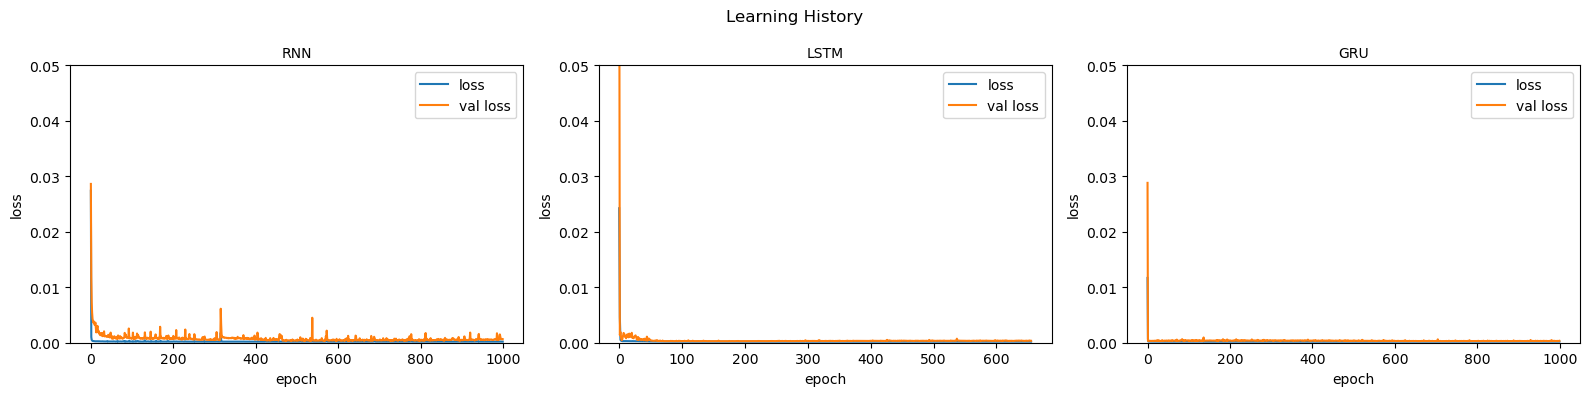

In [24]:
# Create a list of subplot subtitles
titles = ['RNN', 'LSTM', 'GRU']

# Create a list of prediction models
models = [rnn_history, Istm_history, gru_history]

# Set the plot area
fig, ax = plt.subplots(1, 3, figsize=(16,4),
tight_layout=True)

# Plot learning progress
plt.suptitle('Learning History')
for i in range(0, 3):
 plt.subplot(1, 3, i+1)
 plt.title(titles[i], fontsize=10)
 plt.plot(models[i].history['loss'], label='loss')
 plt.plot(models[i].history['val_loss'], label='val loss')
 plt.xlabel('epoch')
 plt.ylabel('loss')
 plt.legend(loc='best')
 plt.ylim([0,0.05])

In [25]:
# Make predictions and reverse the predicted values to actual values

# Predict by RNN model
rnn_y_pred=rnn.predict(X_test)
rnn_y_pred=scaler.inverse_transform(rnn_y_pred)

# Predict by LSTM model
lstm_y_pred=Istm.predict(X_test)
lstm_y_pred=scaler.inverse_transform(lstm_y_pred)

# Predict by GRU model
gru_y_pred=gru.predict(X_test)
gru_y_pred=scaler.inverse_transform(gru_y_pred)

# Reverse test data to actual values
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step


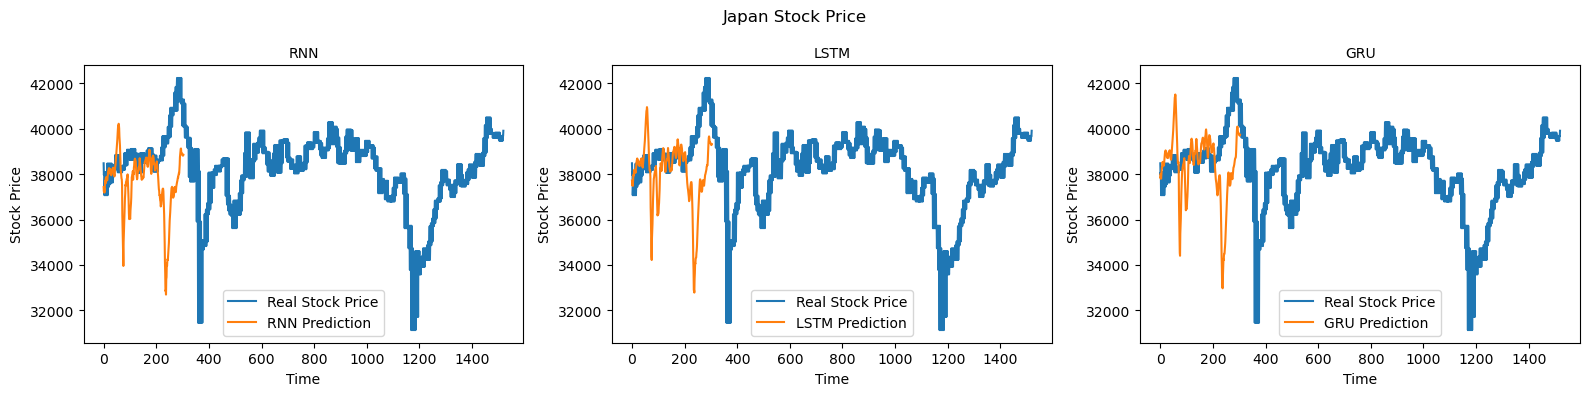

In [26]:
# Visualize Prediction Results

# Set subplot subtitles
titles = ['RNN', 'LSTM', 'GRU']

# Create a list of prediction models
models = [rnn_y_pred, lstm_y_pred, gru_y_pred]

# Set the plot area
fig, ax = plt.subplots(1, 3, figsize=(16,4),
tight_layout=True)

# Set the title
plt.suptitle('Japan Stock Price')

# Create and show subplots
for i in range(0, 3):
  plt.subplot(1, 3,i+1)
  plt.title(titles[i], fontsize=10)
  plt.plot(y_test, label='Real Stock Price')
  plt.plot(models[i], label=titles[i]+' Prediction')
  plt.legend()
  plt.xlabel('Time')
  plt.ylabel('Stock Price')